<a href="https://colab.research.google.com/github/TZ2024/587HW4/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.

In [1]:
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("diabetes_train.csv")
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,tested_positive
754,8,154,78,32,0,32.4,0.443,45,tested_positive
755,1,128,88,39,110,36.5,1.057,37,tested_positive
756,7,137,90,41,0,32.0,0.391,39,tested_negative


In [4]:
#remove all space in df columns name
df.columns = [column.replace(' ', '') for column in df.columns]

In [5]:
X = df.drop('class', axis=1)
y = df['class']

In [6]:
X_test = X.tail(10)
X_train = X.head(len(df) - 10)

y_test = y.tail(10)
y_train = y.head(len(df) - 10)

In [7]:
clf = svm.SVC()

In [8]:
clf.fit(X_train, y_train)

SVC()

In [9]:
y_pred = clf.predict(X_test)

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7


3.

In [11]:
import pandas as pd
import numpy as np

# Given DataFrame
df = pd.DataFrame({'x1': [2, 2, 8, 5, 7, 6, 1, 4],
                   'x2': [10, 5, 4, 8, 5, 4, 2, 9]})

# Initial centers
center_1 = df.iloc[7]  # Last point
center_2 = df.iloc[2]  # Third point

# Function to calculate Manhattan distance
def manhattan_distance(x1, y1, x2, y2):
    return abs(x1 - x2) + abs(y1 - y2)

# Assigning memberships
clusters = {'cluster_1': [], 'cluster_2': []}
for index, row in df.iterrows():
    distance_to_center_1 = manhattan_distance(row['x1'], row['x2'], center_1['x1'], center_1['x2'])
    distance_to_center_2 = manhattan_distance(row['x1'], row['x2'], center_2['x1'], center_2['x2'])

    if distance_to_center_1 <= distance_to_center_2:
        clusters['cluster_1'].append(index)
    else:
        clusters['cluster_2'].append(index)

# Computing centroids
centroid_1 = df.iloc[clusters['cluster_1']].mean()
centroid_2 = df.iloc[clusters['cluster_2']].mean()

clusters, centroid_1, centroid_2


({'cluster_1': [0, 1, 3, 7], 'cluster_2': [2, 4, 5, 6]},
 x1    3.25
 x2    8.00
 dtype: float64,
 x1    5.50
 x2    3.75
 dtype: float64)

In [12]:
# Updating clusters based on new centroids
new_clusters = {'cluster_1': [], 'cluster_2': []}
for index, row in df.iterrows():
    distance_to_centroid_1 = manhattan_distance(row['x1'], row['x2'], centroid_1['x1'], centroid_1['x2'])
    distance_to_centroid_2 = manhattan_distance(row['x1'], row['x2'], centroid_2['x1'], centroid_2['x2'])

    if distance_to_centroid_1 <= distance_to_centroid_2:
        new_clusters['cluster_1'].append(index)
    else:
        new_clusters['cluster_2'].append(index)

new_clusters


{'cluster_1': [0, 1, 3, 7], 'cluster_2': [2, 4, 5, 6]}

4.

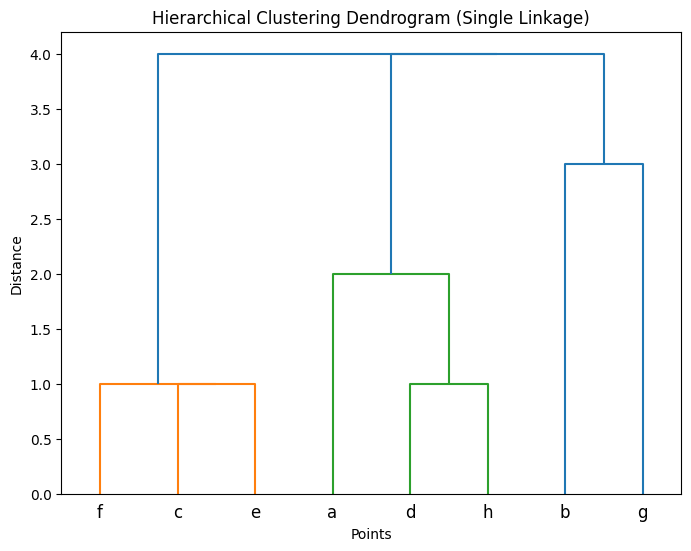

In [15]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Distance matrix provided by the user
dist_matrix = np.array([
    [0, 5, 8, 4, 7, 7, 8, 2],
    [5, 0, 6, 4, 5, 4, 3, 4],
    [8, 6, 0, 5, 1, 2, 7, 6],
    [4, 4, 5, 0, 4, 4, 7, 1],
    [7, 5, 1, 4, 0, 1, 7, 5],
    [7, 4, 2, 4, 1, 0, 5, 5],
    [8, 3, 7, 7, 7, 5, 0, 8],
    [2, 4, 6, 1, 5, 5, 8, 0]
])

# Since we have a distance matrix, we need to convert it to the condensed form that scipy expects
# The distance matrix is symmetric, so we can use only the upper triangle excluding the diagonal
condensed_dist_matrix = sch.distance.squareform(dist_matrix, checks=False)

# Perform hierarchical clustering using single linkage
Z = sch.linkage(condensed_dist_matrix, method='single')

# Plot the dendrogram
plt.figure(figsize=(8, 6))
sch.dendrogram(Z, labels=list('abcdefgh'))
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Points')
plt.ylabel('Distance')

# Display the dendrogram
plt.show()


In [14]:
# Define epsilon and minPts
epsilon = 6
minPts = 2

# Identify core points
core_points = {}
for i, point in enumerate('abcdefgh'):
    # Find points within ε distance, including itself
    neighbors = np.where(dist_matrix[i] <= epsilon)[0]
    # Adjust count for minPts (which includes the point itself)
    core_points[point] = len(neighbors) >= minPts

core_points


{'a': True,
 'b': True,
 'c': True,
 'd': True,
 'e': True,
 'f': True,
 'g': True,
 'h': True}